#Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

#Read and Merging Data

In [2]:
application_record = pd.read_csv('/content/application_record.csv')
credit_record = pd.read_csv('/content/credit_record.csv')

In [3]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
application_record.shape

(438557, 18)

In [8]:
credit_record.shape

(1048575, 3)

In [9]:
df = pd.merge(application_record, credit_record, on="ID", how="inner")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


#Data Cleaning

In [10]:
df.shape

(777715, 20)

In [11]:
df.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [12]:
df.duplicated().sum()

0

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [15]:
df.shape

(537667, 20)

In [16]:
def column_info(df):
  cols=[]
  dtypes=[]
  uniq_v=[]
  n_uniqu_v=[]

  for col in df.columns:
    cols.append(col)
    dtypes.append(df[col].dtype.name)
    uniq_v.append(df[col].unique())
    n_uniqu_v.append(df[col].nunique())

  return pd.DataFrame({'Name':cols , 'Types':dtypes,'unique':uniq_v,'n unique':n_uniqu_v})

In [17]:
column_info(df)

,Name,Types,unique,n unique
0,ID,int64,"[5008806, 5008808, 5008809, 5008810, 5008811, ...",25134
1,CODE_GENDER,object,"[M, F]",2
2,FLAG_OWN_CAR,object,"[Y, N]",2
3,FLAG_OWN_REALTY,object,"[Y, N]",2
4,CNT_CHILDREN,int64,"[0, 3, 1, 2, 4, 14, 5, 19, 7]",9
5,AMT_INCOME_TOTAL,float64,"[112500.0, 270000.0, 135000.0, 130500.0, 15750...",195
6,NAME_INCOME_TYPE,object,"[Working, Commercial associate, State servant,...",5
7,NAME_EDUCATION_TYPE,object,"[Secondary / secondary special, Higher educati...",5
8,NAME_FAMILY_STATUS,object,"[Married, Single / not married, Civil marriage...",5
9,NAME_HOUSING_TYPE,object,"[House / apartment, Rented apartment, Municipa...",6


**Calculate Age and employment length**

In [18]:
df['AGE'] = (-df['DAYS_BIRTH'] // 365)
df['YEARS_EMPLOYED'] = (-df['DAYS_EMPLOYED'] // 365)

Add new column :
* 1 (Approved): Applicants with a good credit history (e.g., STATUS of 0, C, or X).
* 0 (Rejected): Applicants with a poor credit history (e.g., STATUS values of 2 or higher).

In [19]:
def determine_approval(status):
    if status.isin(['2', '3', '4', '5']).any():
        return 0
    else:
        return 1

In [20]:
approval = df.groupby('ID')['STATUS'].apply(determine_approval)

In [21]:
df = df.merge(approval.rename('APPROVED'), on='ID', how='left')

**Drop columns unuseful**

In [22]:
df.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'STATUS', 'FLAG_MOBIL'], axis=1, inplace=True)

**Encode categorical variables**

In [23]:
object_features=[]
for col in df.columns:
  if df[col].dtype=='object':
    object_features.append(col)

In [24]:
object_features

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [25]:
for col in object_features:
  le = LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [26]:
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype(int)

In [27]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,AGE,YEARS_EMPLOYED,APPROVED
0,5008806,1,1,1,0,112500.0,4,4,1,1,0,0,0,16,2,0,58,3,1
1,5008806,1,1,1,0,112500.0,4,4,1,1,0,0,0,16,2,-1,58,3,1
2,5008806,1,1,1,0,112500.0,4,4,1,1,0,0,0,16,2,-2,58,3,1
3,5008806,1,1,1,0,112500.0,4,4,1,1,0,0,0,16,2,-3,58,3,1
4,5008806,1,1,1,0,112500.0,4,4,1,1,0,0,0,16,2,-4,58,3,1


In [28]:
column_info(df)

,Name,Types,unique,n unique
0,ID,int64,"[5008806, 5008808, 5008809, 5008810, 5008811, ...",25134
1,CODE_GENDER,int64,"[1, 0]",2
2,FLAG_OWN_CAR,int64,"[1, 0]",2
3,FLAG_OWN_REALTY,int64,"[1, 0]",2
4,CNT_CHILDREN,int64,"[0, 3, 1, 2, 4, 14, 5, 19, 7]",9
5,AMT_INCOME_TOTAL,float64,"[112500.0, 270000.0, 135000.0, 130500.0, 15750...",195
6,NAME_INCOME_TYPE,int64,"[4, 0, 2, 3, 1]",5
7,NAME_EDUCATION_TYPE,int64,"[4, 1, 2, 3, 0]",5
8,NAME_FAMILY_STATUS,int64,"[1, 3, 0, 2, 4]",5
9,NAME_HOUSING_TYPE,int64,"[1, 4, 2, 5, 0, 3]",6


#Data Splitting and Check balanced

In [29]:
x = df.drop(['ID','APPROVED'], axis=1)
y = df['APPROVED']

In [30]:
y.value_counts()

,count
APPROVED,
1,523495
0,14172


In [31]:
smote = SMOTE( sampling_strategy='minority', random_state=42)
x_res , y_res=smote.fit_resample(x,y)

In [32]:
y_res.value_counts()

,count
APPROVED,
1,523495
0,523495


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=.2, random_state=42)

In [34]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Build Model

In [35]:
model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#Predictions

In [36]:
y_pred = model.predict(x_test)

#Evaluate the Model

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [38]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    105062
           1       1.00      0.97      0.99    104336

    accuracy                           0.99    209398
   macro avg       0.99      0.99      0.99    209398
weighted avg       0.99      0.99      0.99    209398



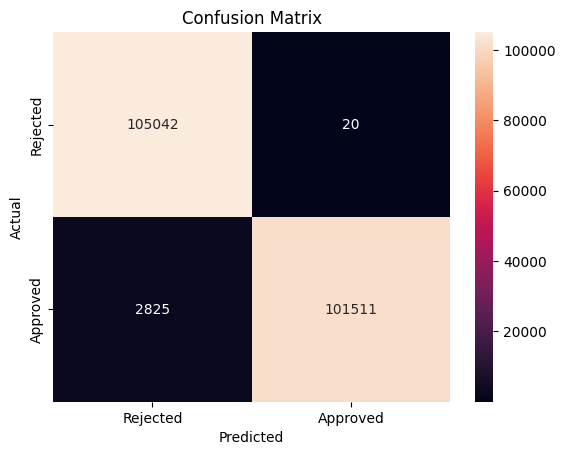

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#Test Model with new input


In [40]:
new_input = {
    'CODE_GENDER': 'M',
    'FLAG_OWN_CAR': 'Y',
    'FLAG_OWN_REALTY': 'Y',
    'CNT_CHILDREN': 2,
    'AMT_INCOME_TOTAL': 120000,
    'NAME_INCOME_TYPE': 'Working',
    'NAME_EDUCATION_TYPE': 'Secondary education',
    'NAME_FAMILY_STATUS': 'Married',
    'NAME_HOUSING_TYPE': 'House / apartment',
    'FLAG_WORK_PHONE' : 1,
    'FLAG_PHONE': 1,
    'FLAG_EMAIL' : 1,
    'OCCUPATION_TYPE': 'Sales staff',
    'CNT_FAM_MEMBERS': 4,
    'MONTHS_BALANCE' : -2,
    'AGE_YEARS': 35,
    'YEARS_EMPLOYED': 5
}


In [41]:
new_input_df = pd.DataFrame([new_input])

In [42]:
new_input_df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,AGE_YEARS,YEARS_EMPLOYED
0,M,Y,Y,2,120000,Working,Secondary education,Married,House / apartment,1,1,1,Sales staff,4,-2,35,5


In [43]:
object_features=[]
for col in new_input_df.columns:
  if new_input_df[col].dtype=='object':
    object_features.append(col)

In [44]:
object_features

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [45]:
for col in object_features:
  le = LabelEncoder()
  new_input_df[col]=le.fit_transform(new_input_df[col])

In [46]:
new_input_df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,AGE_YEARS,YEARS_EMPLOYED
0,0,0,0,2,120000,0,0,0,0,1,1,1,0,4,-2,35,5


In [47]:
new_prediction = model.predict(new_input_df)

if new_prediction[0] == 1:
    print("Approved: The credit card application is likely to be approved.")
else:
    print("Rejected: The credit card application is likely to be rejected.")

Approved: The credit card application is likely to be approved.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [48]:
new_prediction_proba = model.predict_proba(new_input_df)
print(f"Approval Probability: {new_prediction_proba[0][1]:.2f}")
print(f"Rejection Probability: {new_prediction_proba[0][0]:.2f}")

Approval Probability: 0.98
Rejection Probability: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
